# Filtrando o produto mais barato

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import matplotlib.pylab as plt
import numpy as np

service = Service(ChromeDriverManager().install())
chrome = webdriver.Chrome(service = service)
chrome.get('https://www.google.com/')


# Filtro

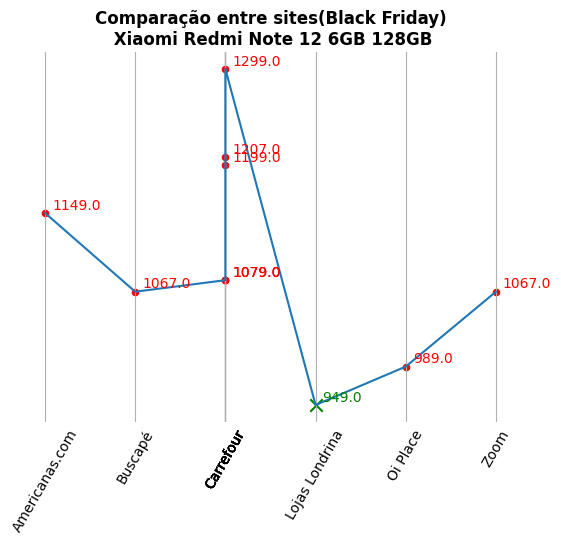

Produto top1 - https://www.lojaslondrina.com.br/produto/smartphone-xiaomi-redmi-note-12-128gb-5g-6gb-ram-snapdragon-camera-tripla-48mp-tela-infinita-de-6-67/?attribute_pa_cor-smartphone=cinza
Produto top2 - https://www.oiplace.com.br/smartphone-xiaomi-redmi-note-12-128gb-6gb-ram---preto/ecca0049-9380-4c46-b999-e0dc9784d9d0.html
Produto top3 - https://www.buscape.com.br/lead?oid=1163347027&sortorder=-1&index=&searchterm=null&pagesize=-1&channel=&pla=2024-01-06T18:24:52.459312


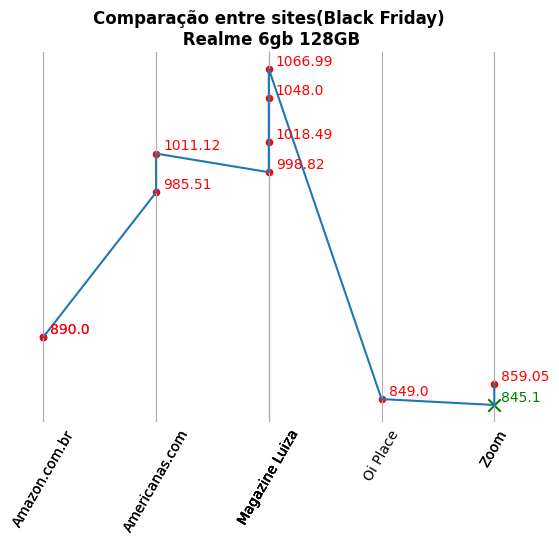

Produto top1 - https://www.zoom.com.br/lead?oid=1132157008&sortorder=-1&index=&searchterm=null&pagesize=-1&channel=&pla=2023-12-09T01:02:36.987630
Produto top2 - https://www.oiplace.com.br/ba31fbd9-53bd-4a22-ae04-e850ffb3b876.html
Produto top3 - https://www.zoom.com.br/lead?oid=1132157006&sortorder=-1&index=&searchterm=null&pagesize=-1&channel=&pla=2023-12-09T01:02:12.889360


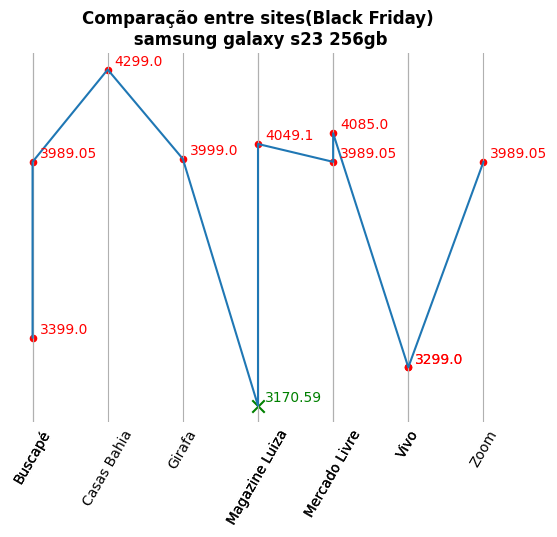

Produto top1 - https://www.magazineluiza.com.br/smartphone-samsung-galaxy-s23-fe-5g-256gb-verde-ram-8gb-processador-octa-core-camera-tripla-traseira-de-50mp-12mp-10mp-selfie-de-12mp-tela-6-4/p/ge1bk590kg/te/ceba/?&seller_id=lojasmastercell
Produto top2 - https://store.vivo.com.br/smartphone-samsung-galaxy-s23-fe-5g-256gb-verde-8gb-ram-tela-6-4-cam-traseira-50-12-8mp-frontal-10mp/p/TGSA500G
Produto top3 - https://store.vivo.com.br/smartphone-samsung-galaxy-s23-fe-5g-256gb-grafite-8gb-ram-tela-6-4-cam-traseira-50-12-8mp-frontal-10mp/p/TGSA5005


In [2]:
import time

time.sleep(2)
produtos = ['Xiaomi Redmi Note 12 6GB 128GB',
            'Realme 6gb 128GB', 
            'samsung galaxy s23 256gb']
produtoBuscar = produtos[:]

for index in range(0,len(produtoBuscar)):
    try:
        barraGoogle = '//*[@id="APjFqb"]'
        chrome.find_element('xpath',barraGoogle).send_keys([produtoBuscar[index],Keys. ENTER,Keys. F11])
        campoFerramentas = '//*[@id="hdtb-tls"]'
        barraResultados = '//*[@id="tn_1"]/span[3]/g-popup/div[1]/div/div/div'
        pedaletra = '//*[@id="lb"]/div/g-menu/g-menu-item[2]/div/a'
        try:
            chrome.find_element('xpath',campoFerramentas).click()
            chrome.find_element('xpath',barraResultados).click()
            chrome.find_element('xpath',pedaletra).click()
        except:
            pass
        # NOME DO PRODUTO
        nome = chrome.find_elements('class name','pymv4e') 
        nome = [no.text for no in nome if no.text != '' ]

        # SITE
        empresa = chrome.find_elements('class name','zPEcBd') 
        empresa = [em.text for em in empresa if em.text != '']

        # PREÇO
        preco = chrome.find_elements('class name','e10twf') 
        preco = [float(pre.text.replace('R$','').replace('.','_').replace(',','.')) for pre in preco if pre.text != '']

        # LINK DO PRODUTOS
        tela = chrome.find_elements(By.CLASS_NAME, 'plantl')
        links,filtro= [lin.get_attribute('href') for lin in tela],[]



        for linkf in links:
            if linkf not in filtro and 'https://www.googleadservices' not in linkf:
                filtro.append(linkf)
            else:
                pass


        dicionario = {
            'PRODUTO' : nome,
            'EMPRESA' : empresa,
            'PRECO'   : preco,
            'LINK'    : filtro
        }


        def filtroNome(nome):
            lista = nome.split(' ') 
            return lista

        tabela = pd.DataFrame.from_dict(dicionario)

        for linha,produto in enumerate(dicionario['PRODUTO']):
            for val in filtroNome(produtoBuscar[index]):        
                if val.upper() in produto.upper():
                    continue
                else:
                    tabela = tabela.drop(linha)
                    break


        top3 = tabela.sort_values('PRECO',ascending=True)
        tabela = top3[:11].sort_values('EMPRESA',ascending=True)

        # Gráfico
        preco = tabela['PRECO']
        empresa = tabela['EMPRESA']
        # plt.figure(figsize=(10,5))
        plt.plot(empresa,preco)

        marcadores = np.where(preco == np.min(preco), 'x', 'o')
        for posicao, marcador in enumerate(marcadores):
            if marcador == 'x':
                cor = 'GREEN'
                tamanho = 80
            else:
                cor = 'red'
                tamanho = 20
            plt.scatter(tabela['EMPRESA'].values[posicao], tabela['PRECO'].values[posicao], marker=marcador, s=tamanho, color=cor)
            plt.annotate(tabela['PRECO'].values[posicao], color=cor, xy=(tabela['EMPRESA'].values[posicao], tabela['PRECO'].values[posicao]), xytext=(5, 3), textcoords='offset points')

        plt.yticks([])
        plt.tick_params(axis='x', length=0)
        plt.title(f'Comparação entre sites(Black Friday)\n {produtoBuscar[index]}',fontweight='bold')
        plt.box(False)
        plt.xticks(empresa, rotation=60)
        plt.grid()
        plt.show()

        for i,link in enumerate(top3[:3]['LINK'].values):
            print(f'Produto top{i + 1} - {link}')
        # limpar campo
        chrome.find_element('xpath','//*[@id="logo"]/img').click()
        top3.to_csv(f'black_html.csv {index}',index=False)
    except:
        print(NameError)
        chrome.find_element('xpath','//*[@id="logo"]/img').click()